<h1>EDA Capstone Project</h1>

Screening for Autism is a lengthy and costly process. The earlier it is diagnosed, the more easily and cost-effectively it can be treated. Therefore, there is a need for shortening the time it takes to screen a patient for autistic spectrum disorder. In this project, I perform exploratory data analysis on a dataset consisting of surveys taken by adults that would allow them to self-screen themselves for ASD. If this screening is accurate, then it could quickly tell a patient whether or not they should pursue a rigorous clinical diagnosis.

<h3>Loading in the data</h3>

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

The dataframe was found on Kaggles database, specifically at https://www.kaggle.com/datasets/faizunnabi/autism-screening/ .
It was labelled as an arff file, with a .arff file type specification. However, it wouldn't load using scipy's arff loading function, giving a "Stop iteration" error. This meant most likely that it couldn't start iterating because the file was either empty or formatted incorrectly. Upon inspecting the file in a text editor, although it had been given the .arff file type specification, it was formatted as a .csv file. So I reformat the file as a .csv and use pandas read_csv() function to load it.

In [2]:
data = pd.read_csv('Autism_Data.csv')
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


<h3>Data Cleaning</h3>

Initial analysis of dataframe, learning its shape and contents

In [3]:
# Dataframe contents
print('Number of instances in dataframe: {} '.format(data.shape[0]))
print('Number of features for each instance: {} \n'.format(data.shape[1]))
print('---Data types of Features---')
print(data.dtypes)

Number of instances in dataframe: 704 
Number of features for each instance: 21 

---Data types of Features---
A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jundice            object
austim             object
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
Class/ASD          object
dtype: object


Features for all data instances are seemingly found to be completely non-null, but upon further inspection some instances seem to have been entered using the question mark specification that is used for missing values in arff files.

In [4]:
# Identifying missing data
data_1 = data.copy()
print(data_1.isnull().sum())
print('\nData with arff "?" null specification')
print(data_1.eq("?").sum())

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

Data with arff "?" null specification
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64


Features with at least ten percent missing values are dropped, and any instance with missing values are dropped.

In [5]:
# Dropping missing data
null_amount_to_drop = 0.1 * data_1.shape[0]
data_1 = data_1.drop((data_1.eq("?").sum()[data_1.eq("?").sum() > null_amount_to_drop]).index, axis=1)
data_1 = data_1.drop(data_1[data_1.age == "?"].index, axis=0)
print("Instances dropped: {}".format(data.shape[0] - data_1.shape[0]))
print("Features dropped: {}\n".format(data.shape[1] - data_1.shape[1]))
data_1.head()

Instances dropped: 2
Features dropped: 2



,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,contry_of_res,used_app_before,result,age_desc,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,no,no,'United States',no,6,'18 and more',NO
1,1,1,0,1,0,0,0,1,0,1,24,m,no,yes,Brazil,no,5,'18 and more',NO
2,1,1,0,1,1,0,1,1,1,1,27,m,yes,yes,Spain,no,8,'18 and more',YES
3,1,1,0,1,0,0,1,1,0,1,35,f,no,yes,'United States',no,6,'18 and more',NO
4,1,0,0,0,0,0,0,1,0,0,40,f,no,no,Egypt,no,2,'18 and more',NO


The age description feature (age_desc) is the same for every entry in this dataset, so it is dropped since it accounts for zero variance

In [6]:
print(data_1["age_desc"].nunique())
data_1.drop(columns=["age_desc"], inplace=True)
print(data_1.columns)

1
Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result',
       'Class/ASD'],
      dtype='object')


Renaming some columns

In [7]:
data_1.rename(columns={"jundice" : "jaundice", "austim" : "family_autism", "contry_of_res" : "country", "used_app_before" : "used_app", "Class/ASD" : "asd_test_positive"}, inplace=True)
data_1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,family_autism,country,used_app,result,asd_test_positive
0,1,1,1,1,0,0,1,1,0,0,26,f,no,no,'United States',no,6,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,no,yes,Brazil,no,5,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,yes,yes,Spain,no,8,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,no,yes,'United States',no,6,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,no,no,Egypt,no,2,NO


The age column is of object type when it is actually numerical, so converting that to an integer type

In [8]:
data_1['age'] = data_1['age'].astype(int)
data_1.dtypes

A1_Score              int64
A2_Score              int64
A3_Score              int64
A4_Score              int64
A5_Score              int64
A6_Score              int64
A7_Score              int64
A8_Score              int64
A9_Score              int64
A10_Score             int64
age                   int32
gender               object
jaundice             object
family_autism        object
country              object
used_app             object
result                int64
asd_test_positive    object
dtype: object

<h3>Feature Encoding</h3>

Changing the binary string features to either 1 or 0.

In [9]:
data_2 = data_1.copy()
binary_obj_columns = []
for column in data_2 :
    if data_2[column].unique().size == 2 and data_2.dtypes[column] == 'object':
        print("Feature {} is of object type and is binary".format(column))
        binary_obj_columns.append(column)
        print("Entry value 1: {}".format(data_2[column].unique()[0]))
        print("Entry value 2: {}\n".format(data_2[column].unique()[1]))

data_binary = data_2[binary_obj_columns]
data_binary.head()

Feature gender is of object type and is binary
Entry value 1: f
Entry value 2: m

Feature jaundice is of object type and is binary
Entry value 1: no
Entry value 2: yes

Feature family_autism is of object type and is binary
Entry value 1: no
Entry value 2: yes

Feature used_app is of object type and is binary
Entry value 1: no
Entry value 2: yes

Feature asd_test_positive is of object type and is binary
Entry value 1: NO
Entry value 2: YES



,gender,jaundice,family_autism,used_app,asd_test_positive
0,f,no,no,no,NO
1,m,no,yes,no,NO
2,m,yes,yes,no,YES
3,f,no,yes,no,NO
4,f,no,no,no,NO


In [10]:
data_2.replace({'family_autism' : {'yes' : 1, 'no' : 0}, 'jaundice' : {'yes' : 1, 'no' : 0}, 'gender' : {'f' : 1, 'm' : 0}, 'family_autism' : {'yes' : 1, 'no' : 0}, 'used_app' : {'yes' : 1, 'no' : 0}, 'asd_test_positive' : {'YES' : 1, 'NO' : 0}}, inplace=True)
data_2.rename(columns={'gender' : 'female'}, inplace=True)
data_2.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,female,jaundice,family_autism,country,used_app,result,asd_test_positive
0,1,1,1,1,0,0,1,1,0,0,26,1,0,0,'United States',0,6,0
1,1,1,0,1,0,0,0,1,0,1,24,0,0,1,Brazil,0,5,0
2,1,1,0,1,1,0,1,1,1,1,27,0,1,1,Spain,0,8,1
3,1,1,0,1,0,0,1,1,0,1,35,1,0,1,'United States',0,6,0
4,1,0,0,0,0,0,0,1,0,0,40,1,0,0,Egypt,0,2,0


Removing the single quotes around some of the country entries, and one hot encoding the country feature

In [11]:
for index, entry in data_2['country'].items() :
    if entry[0] == "'" and entry[-1] == "'" :
        entry = entry[1:-1]
        data_2.at[index, 'country'] = entry
data_2 = pd.get_dummies(data_2, columns=['country'], prefix='', prefix_sep='', dtype=int)
data_2.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Sri Lanka,Sweden,Tonga,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Viet Nam
0,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data_2.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'female',
       'jaundice', 'family_autism', 'used_app', 'result', 'asd_test_positive',
       'Afghanistan', 'AmericanSamoa', 'Angola', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh',
       'Belgium', 'Bolivia', 'Brazil', 'Burundi', 'Canada', 'Chile', 'China',
       'Costa Rica', 'Cyprus', 'Czech Republic', 'Ecuador', 'Egypt',
       'Ethiopia', 'Finland', 'France', 'Germany', 'Hong Kong', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Italy', 'Japan',
       'Jordan', 'Kazakhstan', 'Lebanon', 'Malaysia', 'Mexico', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Oman', 'Pakistan',
       'Philippines', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia',
       'Serbia', 'Sierra Leone', 'South Africa', 'Spain', 'Sri Lanka',
       'Sweden', 'Tonga', '

At this point, all features should be integer types.

In [13]:
print(data_2.dtypes.to_string())

A1_Score                int64
A2_Score                int64
A3_Score                int64
A4_Score                int64
A5_Score                int64
A6_Score                int64
A7_Score                int64
A8_Score                int64
A9_Score                int64
A10_Score               int64
age                     int32
female                  int64
jaundice                int64
family_autism           int64
used_app                int64
result                  int64
asd_test_positive       int64
Afghanistan             int32
AmericanSamoa           int32
Angola                  int32
Argentina               int32
Armenia                 int32
Aruba                   int32
Australia               int32
Austria                 int32
Azerbaijan              int32
Bahamas                 int32
Bangladesh              int32
Belgium                 int32
Bolivia                 int32
Brazil                  int32
Burundi                 int32
Canada                  int32
Chile     

<h3>Univariate Analysis</h3>

Since the outcome feature of the survey test ('asd_test_positive') is binary, the sum of the two different outcomes can be examined. It is found that the percentage of positive values for the outcome feature of the survey test is about 27% of all entries.

asd_test_positive
0    513
1    189
Name: count, dtype: int64

Percentage of entries that have positive asd test: 0.2692307692307692




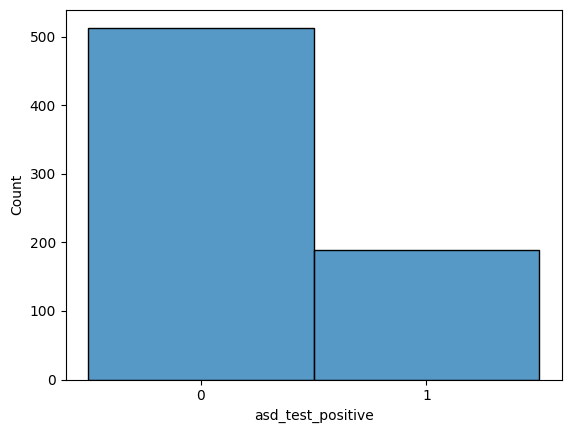

In [14]:
plot = sns.histplot(data_2['asd_test_positive'], discrete=True)
plot.set_xticks(range(0, 2))

print(data_2['asd_test_positive'].value_counts())
print("\nPercentage of entries that have positive asd test: {}\n\n".format(data_2['asd_test_positive'].value_counts()[1] / data_2['asd_test_positive'].shape[0]))

Now looking at the age differences between entries,

Maximum age entry: 383


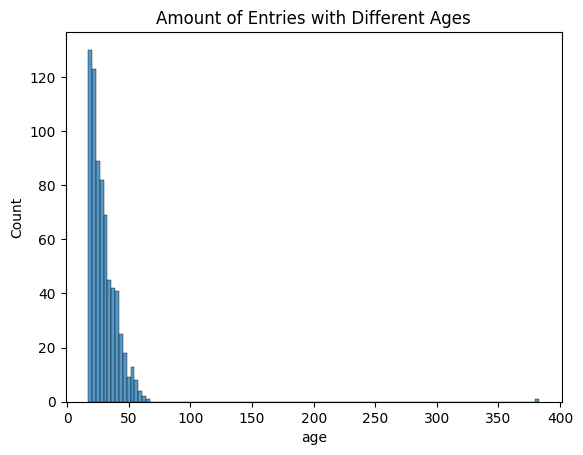

In [15]:
sns.histplot(data_2.sort_values('age')['age']).set(title='Amount of Entries with Different Ages')
print("Maximum age entry: {}".format(data_2['age'].max()))

Delete the odd extremely high age outlier entry (and anything above 100 as a sanity check), and plot the histogram again

Maximum age entry: 64


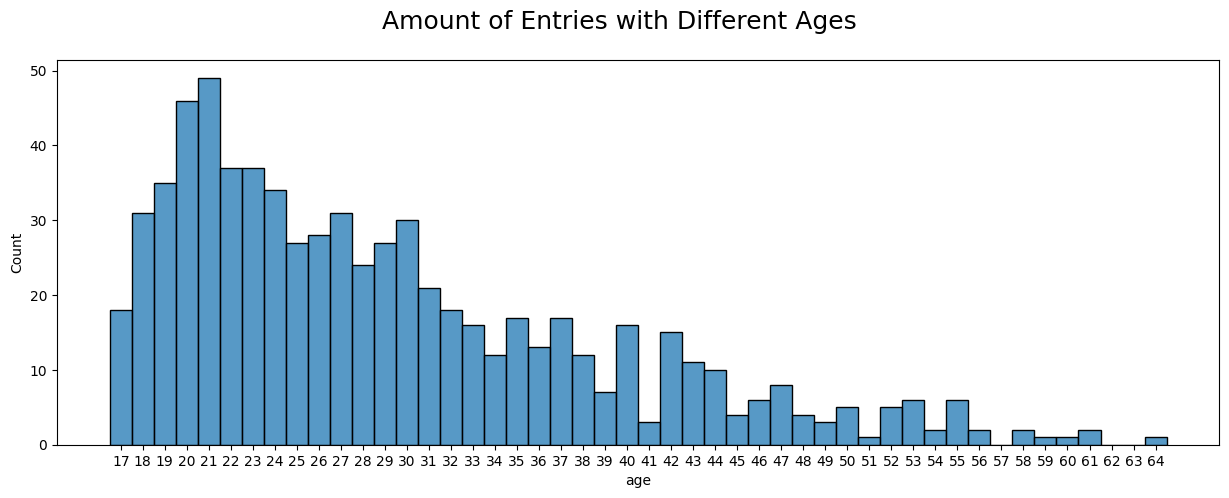

In [16]:
data_2.drop(data_2[data_2['age'] > 100].index, inplace=True)
print("Maximum age entry: {}".format(data_2['age'].max()))

fig, ax = plt.subplots(figsize=(15, 5))

histogram = sns.histplot(data_2.sort_values('age')['age'], discrete=True)
histogram.set_xticks(range(data_2['age'].min(), data_2['age'].max() + 1))

fig.suptitle('Amount of Entries with Different Ages', fontsize=18)
plt.show()

The age is positively skewed, with a larger amount of entries younger than the median age, and platykurtic with a less steep peak than a normal curve.

In [17]:
print("Age skewness: {}".format(data_2['age'].skew()))
print("Age kurtosis: {}".format(data_2['age'].kurtosis()))

Age skewness: 1.0351463253904503
Age kurtosis: 0.5168081332348646


<h3>Bivariate Analysis</h3>

Bar plot of raw sum of ASD positive survey test results grouped by age

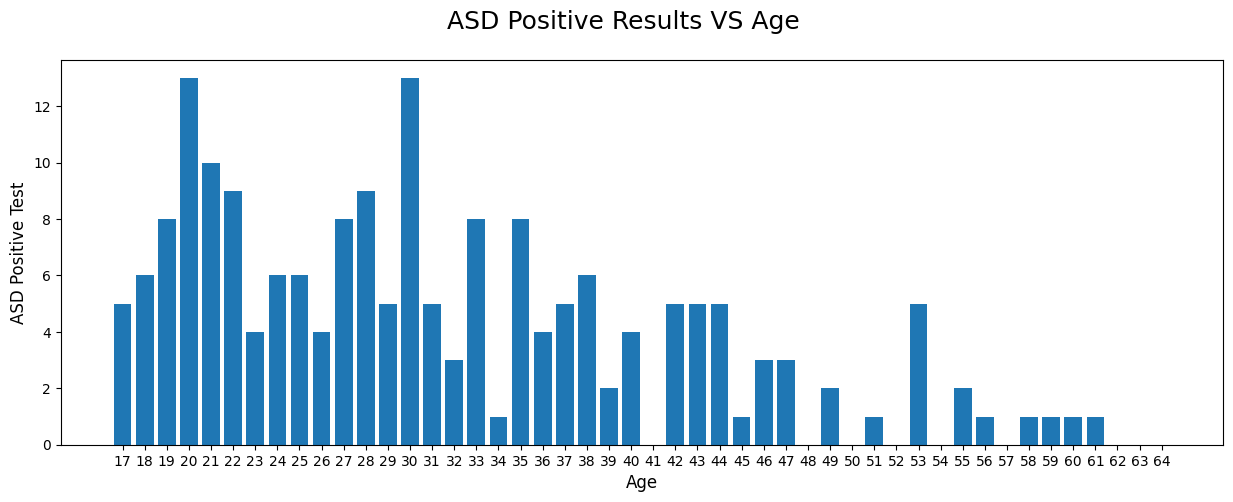

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(data_2.groupby(['age']).sum().index, data_2.groupby(['age']).sum()['asd_test_positive'])
ax.set_xticks(range(data_2['age'].min(), data_2['age'].max() + 1))

fig.suptitle('ASD Positive Results VS Age', fontsize=18)
plt.xlabel('Age', fontsize=12)
plt.ylabel('ASD Positive Test', fontsize=12)

plt.show()

Same bar plot, but weighted by amount of entries per age

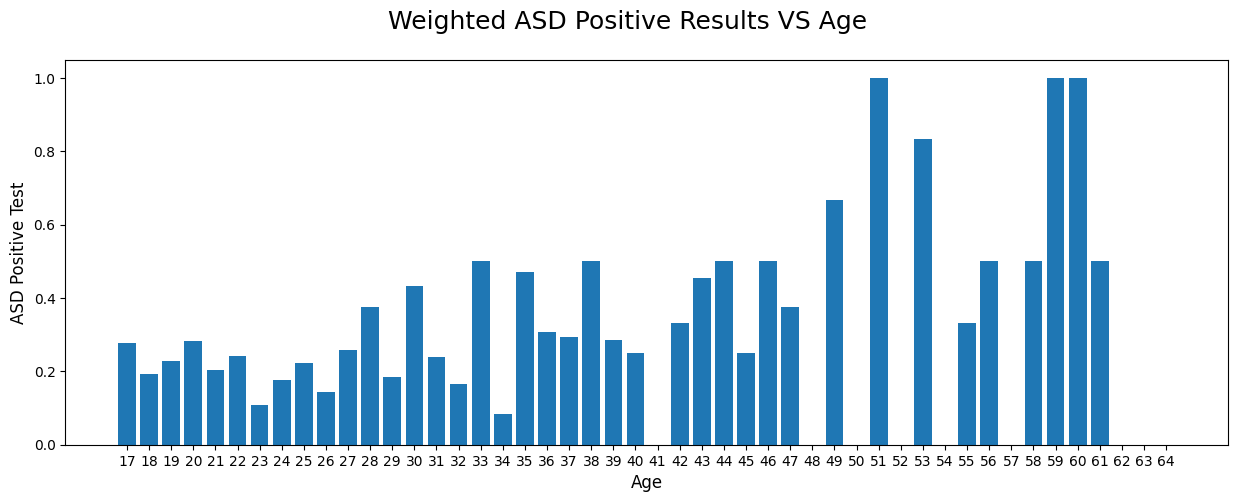

In [19]:
weighted_age_sorted_data = data_2.groupby(['age']).sum()['asd_test_positive'] / data_2.value_counts('age')
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(weighted_age_sorted_data.index, weighted_age_sorted_data)
ax.set_xticks(range(data_2['age'].min(), data_2['age'].max() + 1))

fig.suptitle('Weighted ASD Positive Results VS Age', fontsize=18)
plt.xlabel('Age', fontsize=12)
plt.ylabel('ASD Positive Test', fontsize=12)

plt.show()

Looking at the weighted graph, it appears as if older age highly affects whether or not the ASD test is positive, however there is a small number of instances with high ages as seen from comparing the non-weighted to the weighted graph.

Dropping all instances where the age only accounts for less than .5% of the data. Using two different for-loops for clarity

In [20]:
ages_to_drop = []
sum = 0
for i, v in data_2.value_counts('age').items() :
    if v / data_2.shape[0] < .005 :
        ages_to_drop.append(i)
        sum += v/data_2.shape[0]
        print("Age to drop: {}".format(i))
        print("Percentage of data: {:.2f} %".format((v/data_2.shape[0]) * 100))

Age to drop: 49
Percentage of data: 0.43 %
Age to drop: 41
Percentage of data: 0.43 %
Age to drop: 54
Percentage of data: 0.29 %
Age to drop: 56
Percentage of data: 0.29 %
Age to drop: 58
Percentage of data: 0.29 %
Age to drop: 61
Percentage of data: 0.29 %
Age to drop: 51
Percentage of data: 0.14 %
Age to drop: 59
Percentage of data: 0.14 %
Age to drop: 60
Percentage of data: 0.14 %
Age to drop: 64
Percentage of data: 0.14 %


In [21]:
data_3 = data_2.copy()

for age in ages_to_drop :
    data_3.drop(data_3[data_3['age'] == age].index, inplace=True)

print("Number of instances dropped: {}".format(data_2.shape[0] - data_3.shape[0]))

Number of instances dropped: 18


Create bar graphs to visually analyze the effect of specific question scores on the overall ASD test results

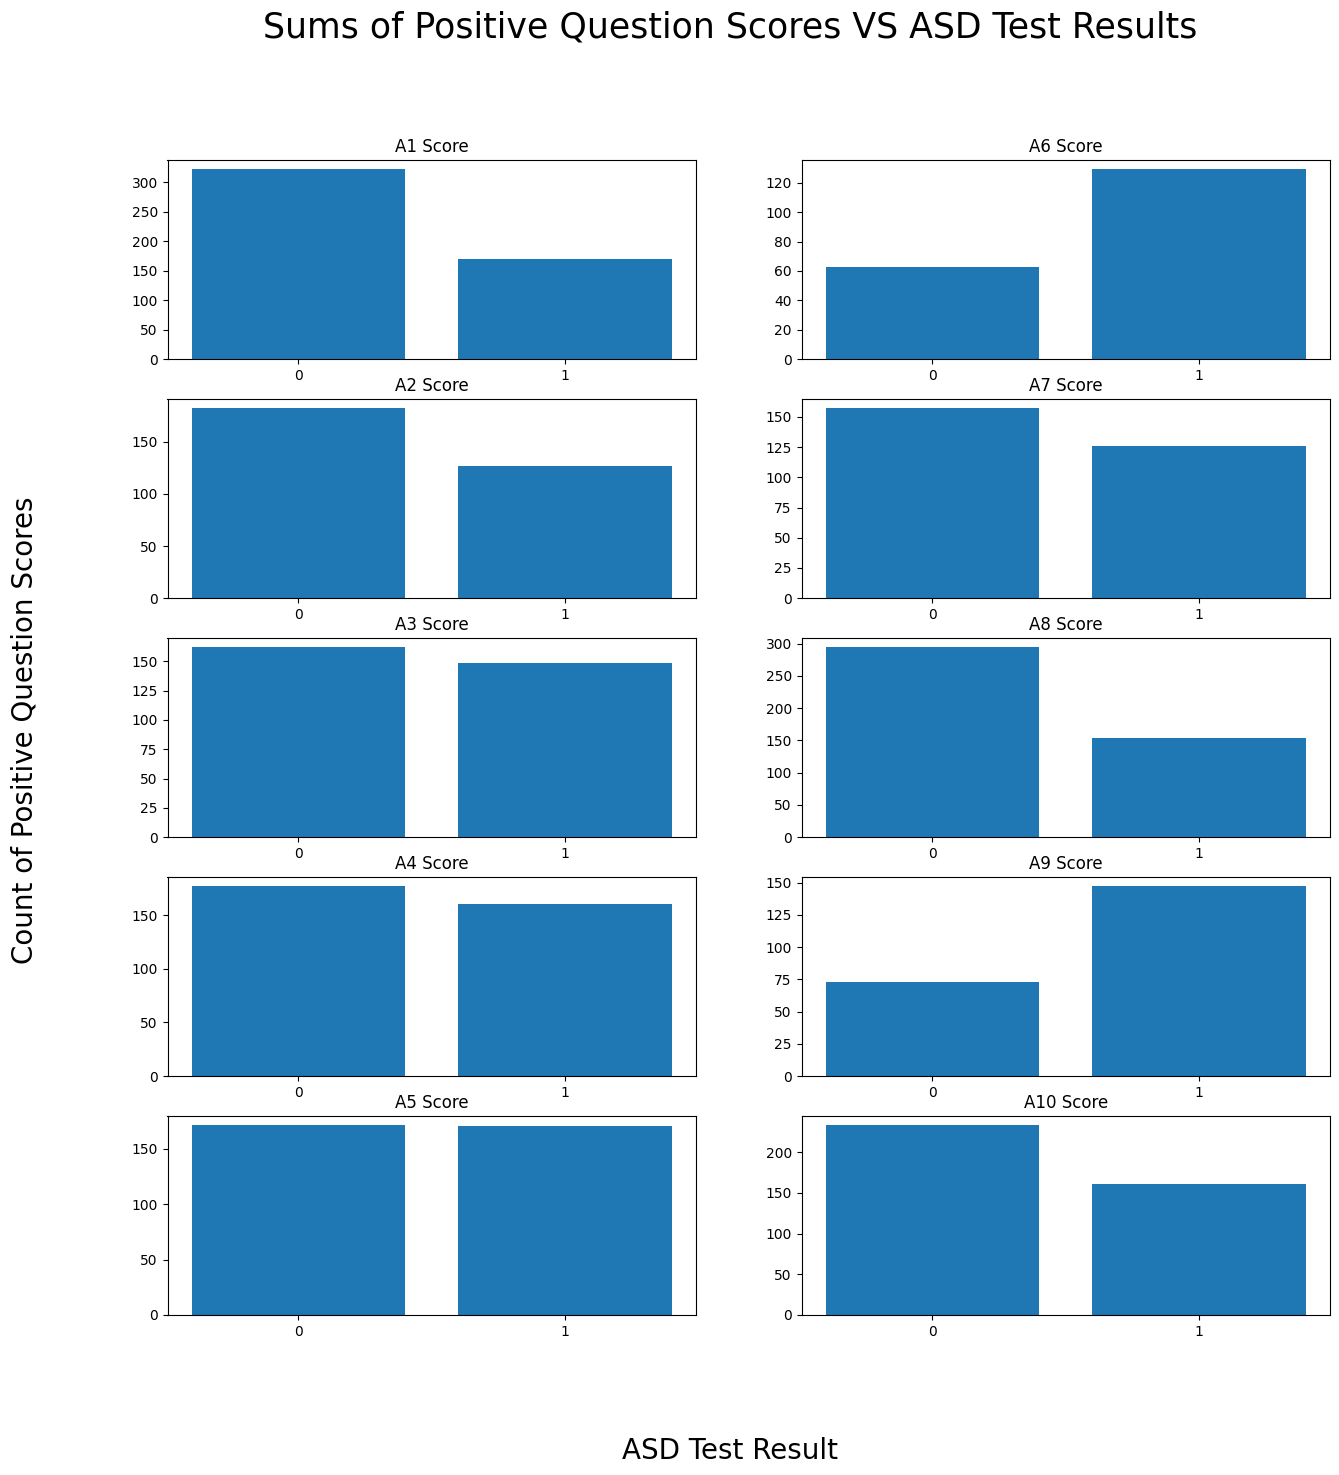

In [44]:
asd_test_positive_sums = data_3.groupby('asd_test_positive').sum()

fig, axs = plt.subplots(5, 2, figsize=(15, 15))

for i in range(10) :
    axs[i%5, math.floor(i/5)].bar(asd_test_positive_sums.index, asd_test_positive_sums["A{}_Score".format(i+1)])
    axs[i%5, math.floor(i/5)].set_xticks([0, 1])
    axs[i%5, math.floor(i/5)].set_title("A{} Score".format(i+1))
        
fig.supxlabel('ASD Test Result', fontsize=20)
fig.supylabel('Count of Positive Question Scores', fontsize=20)
fig.suptitle('Sums of Positive Question Scores VS ASD Test Results', fontsize=25)

plt.show()

Visually analyzing these graphs, we see that when there was a 1 score for the A6 and A9 test, there was a high chance there would be a positive ASD test result, and when there was a 1 score for the A1 and A8 test, there was a high chance of a negative ASD test result.